In [1]:
!pip install Biopython
!pip install wordcloud
!pip install spacy
!pip install gensim
!pip install pyLDAvis
!python -m spacy download en_core_web_sm

import pandas as pd
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from pprint import pprint
from gensim.models import CoherenceModel
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 29.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
df=pd.read_csv('uc4_all_pmids.csv')
df

,PMID
0,29479954
1,31759344
2,31745237
3,30806345
4,34967848
...,...
10699,29384470
10700,33038027
10701,35511694
10702,36373988


In [4]:
lists=df['PMID'].tolist()
len(lists)

10704

In [5]:
from Bio import Entrez

Entrez.email = 'your_email@provider.com'

pmids = lists
handle = Entrez.efetch(db="pubmed", id=','.join(map(str, pmids)),
                       rettype="xml", retmode="text")
records = Entrez.read(handle)


abstract=[]
noma=0
n=0
for pubmed_article in records['PubmedArticle']:
  n=n+1           
  try:
    abstract.append(pubmed_article['MedlineCitation']['Article']['Abstract']['AbstractText'][0])
  except: 
    # abstract.append('\nno abstracts available.\n')
    noma=noma+1
    continue
    


# abstract_dict = dict(zip(pmids, abstracts))
abstract


['Introduction: Cervical cancer rates vary across the world, being highest in Eastern Africa (including Zimbabwe) and lowest in Western Asia. It is the second most common type of cancer in women in the South East Asia region and a major cause of cancer deaths among women of low and middle income countries (LMICs) like Nepal. This review is an attempt to make a comprehensive report of prevalence, incidence and mortality of cervical cancer in LMICs. Methods: The review was conducted applying a computerized search with the Medical Subject Heading (MeSH) major topics “Cervical Cancer”, “Cervical neoplasm” “Epidemiology”, (“prevalence” OR “incidence” OR “mortality”) and “HPV” OR “Human papillomavirus” as MeSH subheading. The search limits were: language (“English”), LMICs, dates (articles published from “1st January 2000 to 31st December 2015”), and species (“Humans”). The search was supplemented by cross-referencing. Publications that met the inclusion criteria were included in the synthes

In [6]:
print(len(abstract))
print(noma)
print(n)

9793
90
9883


In [7]:
with open("stopwords.txt", "r") as f:
    sw = f.read().split()
    
for w in range(0,len(sw)):
  sw[w]=sw[w].strip()

In [8]:
abstract_=abstract.copy()
# abstract_

In [11]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize

def lemmatize_and_remove_stopwords(sentence,ssww):

  lemmat=WordNetLemmatizer()

  stopWords = nltk.corpus.stopwords.words('english')
  extra = ssww
  stopWords.extend(extra)

  filtered_list = []
  stop_words = stopWords
  words = word_tokenize(sentence)
  for w in words:
      if w.lower() not in stop_words:
          filtered_list.append(lemmat.lemmatize(w))         

  return " ".join(filtered_list)

for x in range(0,len(abstract_)):
  abstract_[x]=re.sub(r'\b[A-Z]+[0-9]*s?\b','', abstract_[x])
  abstract_[x]=re.sub(r'[\(\[].*?[\)\]]','', abstract_[x])
  abstract_[x]=abstract_[x].lower()
  abstract_[x]=re.sub(r'attributes=.*}','',abstract_[x])
  abstract_[x]=re.sub(r'StringElement','',abstract_[x])
  abstract_[x]=re.sub(r'\(.{0,5}\)','',abstract_[x])
  abstract_[x]=re.sub(r'[^\w\s]','',abstract_[x])
  abstract_[x]=re.sub(r'[0-9]',' ',abstract_[x])
  abstract_[x]=re.sub(r'(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', abstract_[x])
  # abstract_[x]=re.sub(r'[a-z]+[^\w]+',' ',abstract_[x])
  abstract_[x]=re.sub(r'\xa0.*',' ',abstract_[x])
  abstract_[x]=lemmatize_and_remove_stopwords(abstract_[x],sw)

In [12]:
abstract_

['cervical vary across world highest eastern africa lowest western asia common woman south east asia major cause woman low middle income nepal comprehensive prevalence cervical method conducted applying computerized search subject heading major topic cervical cervical neoplasm epidemiology human papillomavirus mesh subheading search limit language date specie search supplemented crossreferencing inclusion criterion synthesis reviewed africa asia south america north america europe oceania found highest reported age standardized year zimbabwe lowest year china nigeria revealed cervical prevalence year age highest reported age standardized year india lowest year colombia addition coitarche tobacco smoking sexual partner history cervical reported significant factor reported prevalence cervical scarcity reveals substantial need cervical prevalence associated factor',
 'conducted association firefighting',
 'link depression anxiety status welldocumented remains unclear comprehensively quanti

In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = abstract_
data_words = list(sent_to_words(data))

In [14]:
dictionary = gensim.corpora.Dictionary(data_words)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_words]

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values= []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics,random_state=100,update_every=1,passes=10,alpha='auto',per_word_topics=True,)        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))


    return model_list, coherence_values, perplexity_values

In [16]:
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=data_words, start=10, limit=100, step=20)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

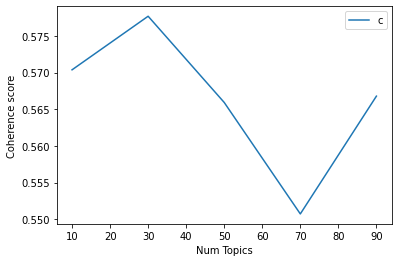

In [17]:
# Show graph
import matplotlib.pyplot as plt

limit=100; start=10; step=20;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.5704
Num Topics = 30  has Coherence Value of 0.5777
Num Topics = 50  has Coherence Value of 0.5659
Num Topics = 70  has Coherence Value of 0.5507
Num Topics = 90  has Coherence Value of 0.5668


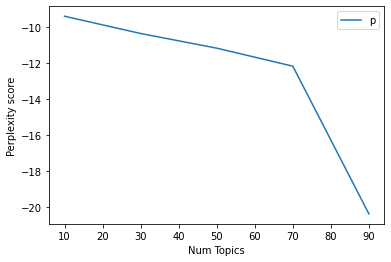

In [19]:
limit=100; start=10; step=20;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [20]:
for m, cv in zip(x, perplexity_values):
    print("Num Topics =", m, " has perplixity Value of", round(cv, 4))

Num Topics = 10  has perplixity Value of -9.3904
Num Topics = 30  has perplixity Value of -10.3478
Num Topics = 50  has perplixity Value of -11.1614
Num Topics = 70  has perplixity Value of -12.1616
Num Topics = 90  has perplixity Value of -20.3599


In [21]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                            )

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [22]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_tfidf]
## topic modeling new improved cleaning 30 topics

[(17,
  '0.018*"hysterectomy" + 0.009*"triplenegative" + 0.008*"pathophysiology" + '
  '0.007*"hepatotoxicity" + 0.007*"hypomethylating" + 0.006*"nonsteroidal" + '
  '0.006*"matrix" + 0.005*"advent" + 0.005*"reliability" + 0.005*"mainstay"'),
 (23,
  '0.012*"emission" + 0.011*"positron" + 0.010*"rural" + 0.008*"paclitaxel" + '
  '0.008*"geriatric" + 0.006*"barrier" + 0.006*"posttreatment" + '
  '0.006*"mismatch" + 0.005*"simple" + 0.005*"promotion"'),
 (4,
  '0.014*"osteosarcoma" + 0.011*"sunitinib" + 0.010*"elective" + 0.009*"iraes" '
  '+ 0.007*"sequential" + 0.005*"extremity" + 0.005*"genital" + '
  '0.004*"estimating" + 0.004*"formaldehyde" + 0.004*"macrophage"'),
 (0,
  '0.016*"pylorus" + 0.013*"nephrectomy" + 0.011*"helicobacter" + '
  '0.009*"myasthenia" + 0.008*"gravis" + 0.007*"utilization" + '
  '0.007*"contemporary" + 0.006*"familial" + 0.006*"thermal" + '
  '0.006*"cisplatinbased"'),
 (18,
  '0.008*"driver" + 0.008*"calcium" + 0.008*"dehydrogenase" + 0.007*"glucose" '
  '+ 

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -10.34791503038457

Coherence Score:  0.5776904574973378


In [24]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
vis
## number of topics 30 // with improved cleaning

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.427658  0.153083       1        1  39.337799
22    -0.321253  0.041079       2        1  13.907480
14    -0.182595 -0.357323       3        1   9.686986
20    -0.040198 -0.015954       4        1   4.567490
19    -0.015282 -0.080138       5        1   3.658380
28     0.021450  0.013070       6        1   2.865953
5      0.031548  0.006398       7        1   2.338858
10     0.016603 -0.024840       8        1   2.029406
21     0.042744  0.015379       9        1   1.587919
3      0.039147  0.011958      10        1   1.525140
27     0.033338  0.006024      11        1   1.482843
1      0.015939  0.000011      12        1   1.280614
8      0.029354  0.009123      13        1   1.269235
12     0.041880  0.012282      14        1   1.235040
6      0.043125  0.015937      15        1   1.200101
16     0.044183  0.016751      16        1   1.133231
2      0.040490  0.016433      17        1   0.995304
25     0.041792  0.007923      18        1   0.983566
29     0.044620  0.015461      19        1   0.904371
24     0.047515  0.014490      20        1   0.900133
13     0.043361  0.011578      21        1   0.894308
11     0.045564  0.015251      22        1   0.877337
26     0.044889  0.010071      23        1   0.861460
15     0.045807  0.013290      24        1   0.737049
7      0.045444  0.013120      25        1   0.734376
18     0.046311  0.012928      26        1   0.658131
0      0.045013  0.012568      27        1   0.639285
4      0.046473  0.011092      28        1   0.607845
23     0.044835  0.011019      29        1   0.568195
17     0.045560  0.011938      30        1   0.532163, topic_info=                Term        Freq       Total Category  logprob  loglift
317        inhibitor   87.000000   87.000000  Default  30.0000  30.0000
742         efficacy  112.000000  112.000000  Default  29.0000  29.0000
624        resection   69.000000   69.000000  Default  28.0000  28.0000
341        screening   67.000000   67.000000  Default  27.0000  27.0000
1678   postoperative   60.000000   60.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
13586      acellular    0.539524    1.045177  Topic30  -5.9791   4.5747
2434           motor    0.539463    1.045116  Topic30  -5.9792   4.5747
6363    definitively    0.671951    1.310469  Topic30  -5.7596   4.5680
5294            take    0.619172    1.332886  Topic30  -5.8414   4.4693
4955          eating    0.782179    2.710510  Topic30  -5.6077   3.9932

[1189 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2463      6  0.546700    abdominal
2463     11  0.410025    abdominal
2973     10  0.532693      ability
2973     20  0.266347      ability
4055     24  0.719940  abiraterone
...     ...       ...          ...
72        1  0.936570         year
72        2  0.029268         year
72        3  0.029268         year
1418      7  0.891665        yield
4416     17  0.897087         zinc

[1424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 23, 15, 21, 20, 29, 6, 11, 22, 4, 28, 2, 9, 13, 7, 17, 3, 26, 30, 25, 14, 12, 27, 16, 8, 19, 1, 5, 24, 18])